In [160]:
#!PIP install seaborn

In [ ]:
import os
from PIL import Image
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import math
import numpy as np
import seaborn as sns   


In [104]:
# Image directory
image_dir = "Datasets\\Dataset\\TrainVal\\color"

# Iterate through images to get dimensions
image_dims = []

for filename in os.listdir(image_dir):
    filepath = os.path.join(image_dir, filename)
    with Image.open(filepath) as img:
        width, height = img.size
        pixels = width * height
        image_dims.append((filename, width, height, pixels))

# Print dimensions
#for filename, width, height, pixels in image_dims:
#    print(f"Image: {filename} - Width: {width}, Height: {height}, Pixels: {pixels}")

# Summary Stats
total_images = len(image_dims)
min_width = min(dim[1] for dim in image_dims)
max_width = max(dim[1] for dim in image_dims)
min_height = min(dim[2] for dim in image_dims)
max_height = max(dim[2] for dim in image_dims)




Summary Stats - Datasets\Dataset\TrainVal\color:
Total Images: 3680
Smallest image by width is: Bombay_103.jpg, with a width of : 114, height of: 143, and 16302 total pixels
Smallest image by height is: Bombay_171.jpg, with a width of : 144, height of: 108, and 15552 total pixels
Largest image by width is: Egyptian_Mau_162.jpg, with a width of : 3264, height of: 2448, and 7990272 total pixels
Largest image by height is: Egyptian_Mau_196.jpg, with a width of : 1886, height of: 2606, and 4914916 total pixels
Smallest image by no. of pixels is: Bombay_171.jpg, with a width of : 144, height of: 108, and 15552 total pixels
Largest image by no. of pixels is: Egyptian_Mau_162.jpg, with a width of : 3264, height of: 2448, and 7990272 total pixels
Average Width: 431.03 with a standard deviation of 126.31
Average Height: 383.42 with a standard deviation of 116.82
Average Pixels: 171954.22 with a standard deviation of 197930.01


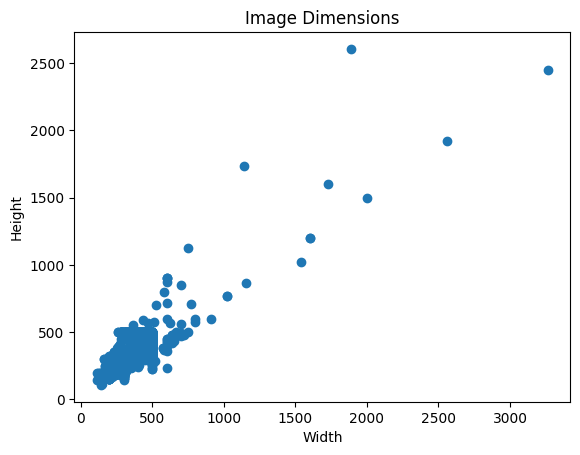

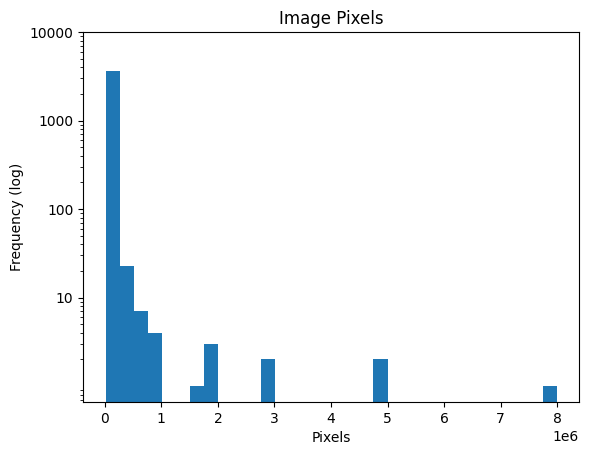

In [105]:


print(f"\nSummary Stats - {image_dir}:")
print(f"Total Images: {total_images}")
min_width_dims = min(image_dims, key=lambda x: x[1])
min_height_dims = min(image_dims, key=lambda x: x[2])   
max_width_dims = max(image_dims, key=lambda x: x[1])
max_height_dims = max(image_dims, key=lambda x: x[2])
min_pixels_dims = min(image_dims, key=lambda x: x[3])
max_pixels_dims = max(image_dims, key=lambda x: x[3])
average_width = sum(dim[1] for dim in image_dims) / total_images
average_height = sum(dim[2] for dim in image_dims) / total_images
average_pixels = sum(dim[3] for dim in image_dims) / total_images
stdev_width = math.sqrt(sum((dim[1] - average_width) ** 2 for dim in image_dims) / total_images)
stdev_height = math.sqrt(sum((dim[2] - average_height) ** 2 for dim in image_dims) / total_images)
stdev_pixels = math.sqrt(sum((dim[3] - average_pixels) ** 2 for dim in image_dims) / total_images)
print(f"Smallest image by width is: {min_width_dims[0]}, with a width of : {min_width_dims[1]}, height of: {min_width_dims[2]}, and {min_width_dims[3]} total pixels")
print(f"Smallest image by height is: {min_height_dims[0]}, with a width of : {min_height_dims[1]}, height of: {min_height_dims[2]}, and {min_height_dims[3]} total pixels")
print(f"Largest image by width is: {max_width_dims[0]}, with a width of : {max_width_dims[1]}, height of: {max_width_dims[2]}, and {max_width_dims[3]} total pixels")
print(f"Largest image by height is: {max_height_dims[0]}, with a width of : {max_height_dims[1]}, height of: {max_height_dims[2]}, and {max_height_dims[3]} total pixels")
print(f"Smallest image by no. of pixels is: {min_pixels_dims[0]}, with a width of : {min_pixels_dims[1]}, height of: {min_pixels_dims[2]}, and {min_pixels_dims[3]} total pixels")
print(f"Largest image by no. of pixels is: {max_pixels_dims[0]}, with a width of : {max_pixels_dims[1]}, height of: {max_pixels_dims[2]}, and {max_pixels_dims[3]} total pixels")
print(f"Average Width: {average_width:.2f} with a standard deviation of {stdev_width:.2f}")
print(f"Average Height: {average_height:.2f} with a standard deviation of {stdev_height:.2f}")
print(f"Average Pixels: {average_pixels:.2f} with a standard deviation of {stdev_pixels:.2f}")

plt.scatter([dim[1] for dim in image_dims], [dim[2] for dim in image_dims])
plt.title("Image Dimensions")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()

plt.hist([dim[3] for dim in image_dims], bins=32, log = True)
plt.yticks([10, 100, 1000, 10000], ["10", "100", "1000", "10000"])
plt.title("Image Pixels")
plt.xlabel("Pixels")
plt.ylabel("Frequency (log)")
plt.show()

Example label image: pixel value and counts {0: 97133, 2: 71755, 255: 47112} for scottish_terrier_16.png


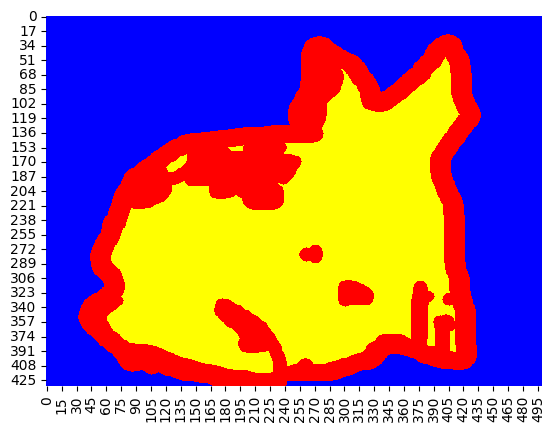

In [159]:
def read_img_mono(path):
    # The L flag converts it to 1 channel.
    img = Image.open(path).convert(mode="L")
    return np.asarray(img)

def read_img(path):
    # The L flag converts it to 1 channel.
    img = Image.open(path).convert()
    return np.asarray(img)

filename= 'scottish_terrier_16.png'
sample_dir = "Datasets\\Dataset\\TrainVal\\label"
filepath = os.path.join(sample_dir, filename)
with Image.open(filepath) as input_img:
    sample_img = np.asarray(input_img)
unique, counts = np.unique(sample_img, return_counts=True)
pixel_val_counts= dict()
for i in range(len(unique)):
    pixel_val_counts[int(unique[i])] = int(counts[i])
print(f'Example label image: pixel value and counts {pixel_val_counts} for {filename}')

#cmap_dict = {0: 'white', 1: 'yellow', 2: 'green', 255: 'blue'}
#cmap = sns.color_palette([cmap_dict[i] for i in range(3)])
#from matplotlib.colors import ListedColormap
#cmap = sns.color_palette(["black", "white", "red"], as_cmap=True)

cmap = mcolors.ListedColormap(['blue', 'green', 'yellow' ,'red'])
bounds = [0, 1, 2,3, 256]
norm = mcolors.BoundaryNorm(bounds, cmap.N)
sns.heatmap(sample_img, cmap=cmap, cbar=False, norm = norm)
plt.show()


